In [64]:
import numpy as np
from estimator import haltere_inspired_weights, V1_inspired_weights
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy.spatial.distance import pdist, squareform

## sample from a GP w/ RBF kernel 

In [65]:
def RBF_covariance_matrix(N, sigma, l):
    t = np.linspace(-5, 5, N).reshape(-1, 1)
    a = squareform(pdist(t, 'sqeuclidean'))
    cov_matrix = (sigma ** 2) * np.exp(-a / (2 * l ** 2)) + np.eye(N) * 1e-4
    return cov_matrix

def RBF_weights(M, N, sigma, l):
    C = RBF_covariance_matrix(N, sigma, l)
    L = la.cholesky(C)
    W = np.dot(L, np.random.randn(N, M))
    return W.T

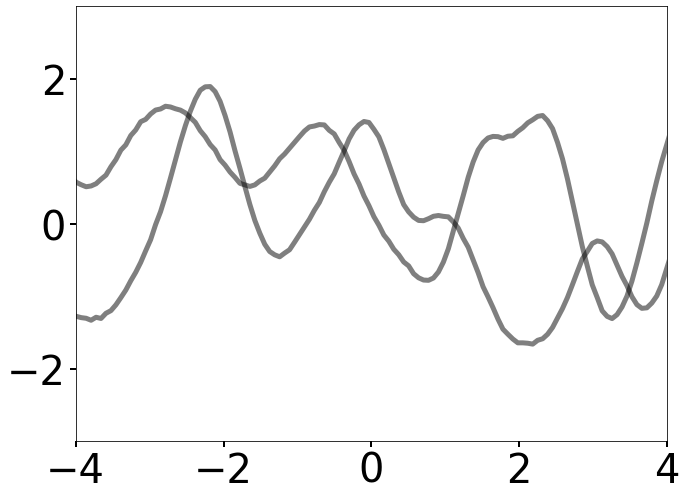

In [92]:
# sampe with parameters that give smooth curves
M, N, sigma, l = 20, 150, 1, 0.5
t = np.linspace(-5, 5, N)
W = RBF_weights(M, N, sigma, l)
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
plt.plot(t, W[0], 'k', lw=5, alpha=0.5)
plt.plot(t, W[1],  'k', lw=5, alpha=0.5)
plt.ylim([-3, 3])
plt.xticks(np.arange(-4, 4.5, 2))
plt.xlim([-4, 4])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
# plt.legend(loc = 'upper right', fontsize=30)
# plt.savefig('results/general_exam/sample_GP_smooth_RBF.png')

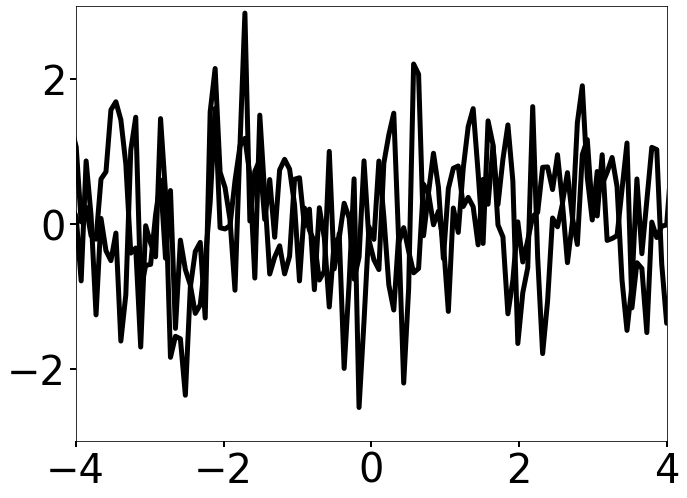

In [79]:
# sampe with parameters that give rough curves and mu is non-zero
M, N, sigma, l, mu = 20, 150, 1, 0.05, 0
t = np.linspace(-5, 5, N)
W = RBF_weights(M, N, sigma, l) + mu
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
plt.plot(t, W[0], 'k', lw=5)
plt.plot(t, W[1],  'k', lw=5)
plt.ylim([-3, 3])
plt.xticks(np.arange(-4, 4.5, 2))
plt.xlim([-4, 4])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
# plt.legend(loc = 'upper right', fontsize=30)
plt.savefig('results/general_exam/sample_GP_rough_RBF.png')

## sample from periodic kernel

In [116]:
def periodic_kernel_covariance_matrix(N, sigma, p, l):
    t = np.linspace(-5, 5, N).reshape(-1, 1)
    a = squareform(pdist(t, 'minkowski', p=1))
    cov_matrix = (sigma ** 2) * np.exp(-2 * np.sin(np.pi * a / p) ** 2 / l ** 2) + np.eye(N) * 1e-4
    return cov_matrix  

def periodic_kernel_weights(M, N, sigma, p, l):
    C = periodic_kernel_covariance_matrix(N, sigma, p, l)
    L = la.cholesky(C)
    W = np.dot(L, np.random.randn(N, M))
    return W.T

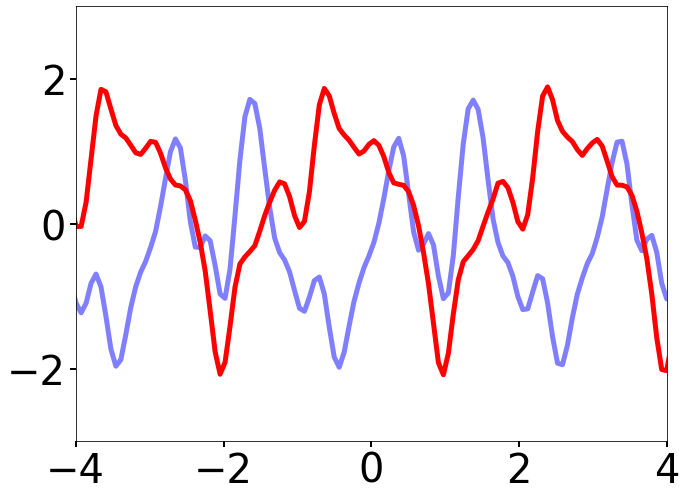

In [222]:
# sample periodic kernel with smooth params
M, N, sigma, p, l = 20, 150, 1, 3, 0.4
t = np.linspace(-5, 5, N)
W = periodic_kernel_weights(M, N, sigma, p, l)

fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
plt.plot(t, W[0], 'b', lw=5, alpha=0.5)
plt.plot(t, W[1],  'r', lw=5)
plt.ylim([-3, 3])
plt.xticks(np.arange(-4, 4.5, 2))
plt.xlim([-4, 4])
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
# plt.legend(loc = 'upper right', fontsize=30)
plt.savefig('results/general_exam/sample_GP_periodic.png')

## sample from V1-kernel

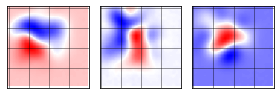

In [119]:
from estimator import V1_inspired_weights_for_center
t, l = 5, 4
W = V1_inspired_weights(30, 784, t=t, l=l)
# W = (W - np.mean(W)) / np.std(W)

fig = plt.figure(figsize=(4, 2))
for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1)
    W = V1_inspired_weights_for_center(784,t, l, [10, 10])
    plt.imshow(W.reshape(28, 28), cmap='bwr')
    ax.set_xticks(np.linspace(0, 28, 5))
    ax.set_yticks(np.linspace(0, 28, 5))
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.tick_params(direction='out', length=0, width=0, colors='k',
               grid_color='k', grid_alpha=0.5)
#     plt.colorbar()
    plt.grid()
plt.tight_layout()
plt.savefig('results/general_exam/V1_weights_t=%0.2f_l=%0.2f.png' % (t, l))

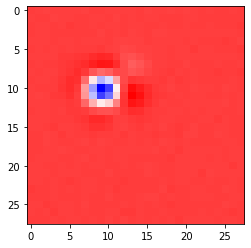

In [97]:
W = V1_inspired_weights_for_center(784,t, l, [10, 10])
fig = plt.figure()
plt.imshow(W.reshape(28, 28), cmap='bwr')

## sample from haltere-kernel

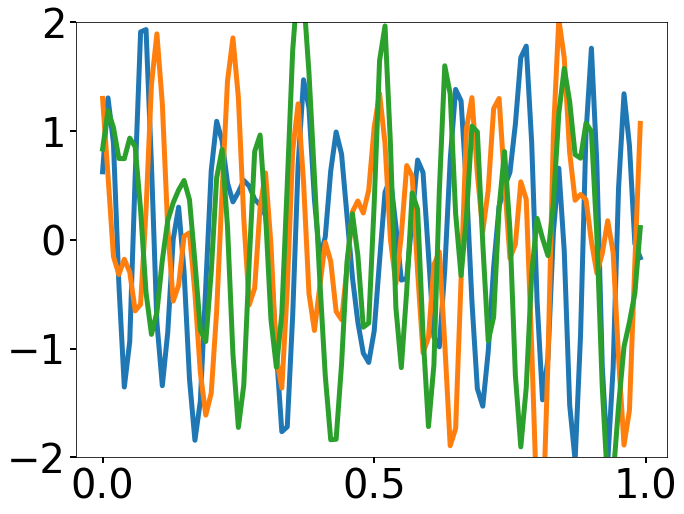

In [91]:
M, N, lowcut, highcut = 20, 100, 3, 20
W = haltere_inspired_weights(M, N, lowcut, highcut)

t = np.arange(0, N, 1)
fig = plt.figure(figsize=(10.6, 8))
ax = fig.add_subplot(111)
plt.plot(t, W[0],  lw=5)
plt.plot(t, W[1],   lw=5)
plt.plot(t, W[2],   lw=5)
plt.xticks(np.arange(0, 101, 50))
plt.ylim([-2, 2])
ax.set_xticklabels(np.arange(0, 1.1, .5))
ax.tick_params(axis = 'both', which = 'major', labelsize = 40, width=2, length=6)
plt.savefig('results/general_exam/haltere_weights_low=%0.2f_high=%0.2f.png' % (lowcut, highcut))